<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset
The following describes the dataset variables:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Make a df copy without first column 'Unnamed: 0'


In [7]:
boston_copy = boston_df.drop(columns='Unnamed: 0')

In [46]:
boston_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int32  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  age_group  506 non-null    object 
dtypes: float64(12), int32(1), object(1)
memory usage: 51.5+ KB


CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) - Convert the column 'CHAS' to type int

In [47]:
boston_copy['CHAS'] = boston_copy['CHAS'].astype(int)

In [45]:
boston_copy.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations

### 1. For the "Median value of owner-occupied homes" provide a boxplot

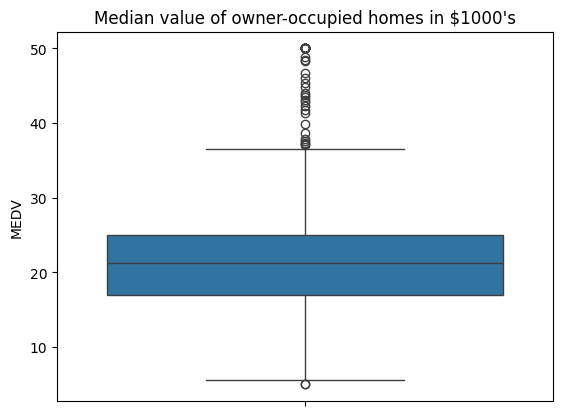

In [51]:
ax = sns.boxplot(data=boston_copy, y='MEDV')
ax.set_title("Median value of owner-occupied homes in $1000's");

### 2. Provide a  bar plot for the Charles river variable

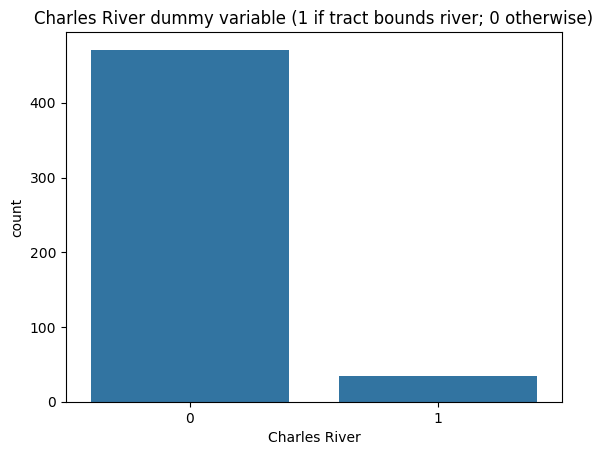

In [56]:
ax = sns.countplot(x='CHAS', data=boston_copy)
ax.set_title('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
pyplot.xlabel('Charles River');

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [12]:
boston_copy.loc[(boston_copy['AGE'] <=35), 'age_group'] = '35 years and younger'
boston_copy.loc[(boston_copy['AGE'] > 35) & (boston_copy['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_copy.loc[(boston_copy['AGE'] >= 70), 'age_group'] = '70 years and older'

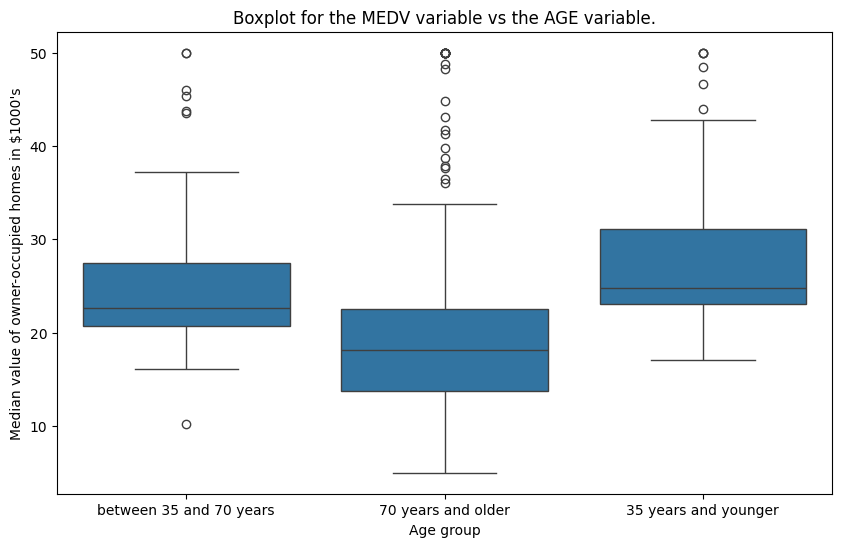

In [18]:
pyplot.figure(figsize=(10, 6))
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_copy)
ax.set_title('Boxplot for the MEDV variable vs the AGE variable.')
pyplot.xlabel('Age group')
pyplot.ylabel("Median value of owner-occupied homes in $1000's");

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

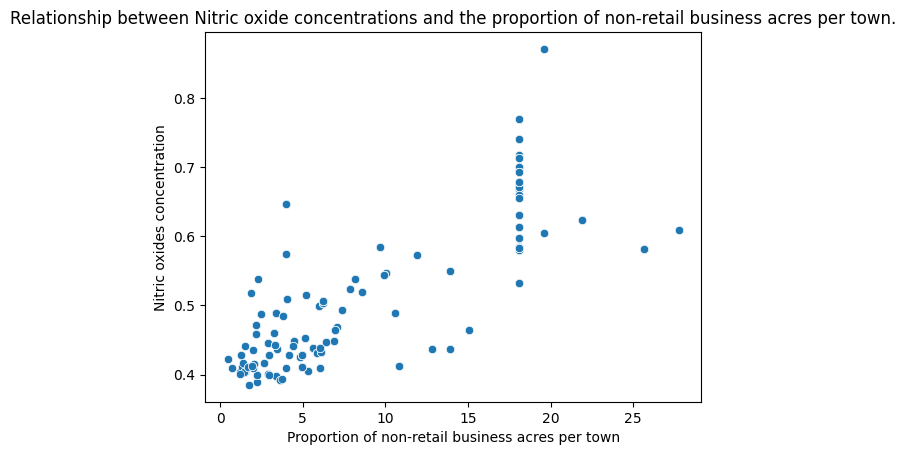

In [55]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_copy)
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel("Nitric oxides concentration");

**Conclusion:** We could sort of see a relationship between the two variables. It's an upward sloping type of a relationship. We see that as Proportion of non-retail business acres per town increases, so does the Nitric oxides concentration.

### 5. Create a histogram for the pupil to teacher ratio variable

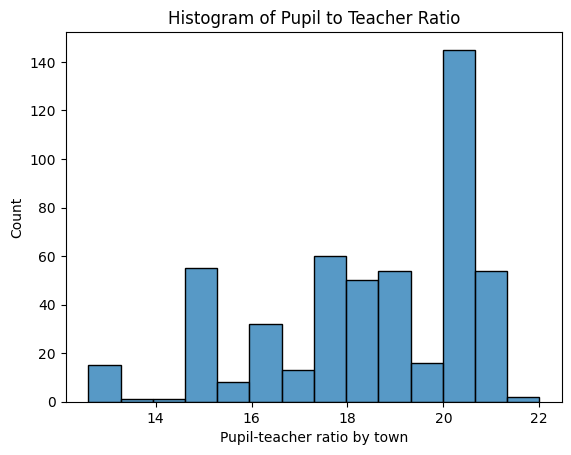

In [57]:
ax = sns.histplot(data=boston_copy, x='PTRATIO', kde=False)
ax.set_title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil-teacher ratio by town');

## Task 3: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference")

Test for equality of variance

In [49]:
# Levene's test to acces the uquality of variances
# p-value is less than 0.05 -> samples' variences are not equal
scipy.stats.levene(boston_copy[boston_copy['CHAS'] == 1]['MEDV'],
                  boston_copy[boston_copy['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [50]:
# T-test for independent samples
# samples' variences are not equal
scipy.stats.ttest_ind(boston_copy[boston_copy['CHAS'] == 1]['MEDV'],
                  boston_copy[boston_copy['CHAS'] == 0]['MEDV'], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - I discretized the age variable into three groups before:

*   35 years and younger
*   between 35 and 70 years
*   70 years and older

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance

In [32]:

scipy.stats.levene(boston_copy[boston_copy['age_group'] == '35 years and younger']['MEDV'],
                  boston_copy[boston_copy['age_group'] == 'between 35 and 70 years']['MEDV'],
                  boston_copy[boston_copy['age_group'] == '70 years and older']['MEDV'], center='mean')

# p-value is greater than 0.05 -> samples' variences are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [33]:
thirtyfive_lower_medv = boston_copy[boston_copy['age_group'] == '35 years and younger']['MEDV']
thirtyfive_sevety_medv = boston_copy[boston_copy['age_group'] == 'between 35 and 70 years']['MEDV']
sevety_older_medv = boston_copy[boston_copy['age_group'] == '70 years and older']['MEDV']

In [34]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_sevety_medv, sevety_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

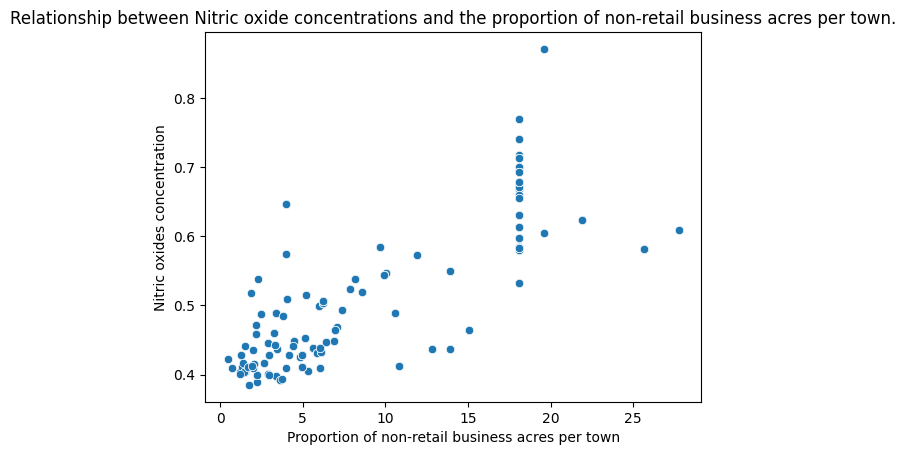

In [58]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_copy)
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel("Nitric oxides concentration");

In [38]:
scipy.stats.pearsonr(boston_copy['INDUS'], boston_copy['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0:$ there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
*   $H\_1:$ there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes


In [41]:
X = boston_copy['DIS']
y = boston_copy['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.21e-08
Time:                        17:30:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes